In [1]:
# Import libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
import numpy as np

**Git Repository Link**
> https://github.com/jstraker1/datasummative_2.git

In [2]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("abdallaahmed77/healthcare-risk-factors-dataset")

print("Path to dataset files:", path)

/Users/fleursmith/Documents/DataScience/.venv/lib/python3.13/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Path to dataset files: /Users/fleursmith/.cache/kagglehub/datasets/abdallaahmed77/healthcare-risk-factors-dataset/versions/1


In [3]:
# Load dataset
df = pd.read_csv(f"{path}/dirty_v3_path.csv")

# Display first few rows
df.head()

,Age,Gender,Medical Condition,Glucose,Blood Pressure,BMI,Oxygen Saturation,LengthOfStay,Cholesterol,Triglycerides,HbA1c,Smoking,Alcohol,Physical Activity,Diet Score,Family History,Stress Level,Sleep Hours,random_notes,noise_col
0,46.0,Male,Diabetes,137.04,135.27,28.90,96.04,6,231.88,210.56,7.61,0,0,-0.20,3.54,0,5.07,6.05,lorem,-137.057211
1,22.0,Male,Healthy,71.58,113.27,26.29,97.54,2,165.57,129.41,4.91,0,0,8.12,5.90,0,5.87,7.72,ipsum,-11.230610
2,50.0,NaN,Asthma,95.24,NaN,22.53,90.31,2,214.94,165.35,5.60,0,0,5.01,4.65,1,3.09,4.82,ipsum,98.331195
3,57.0,NaN,Obesity,NaN,130.53,38.47,96.60,5,197.71,182.13,6.92,0,0,3.16,3.37,0,3.01,5.33,lorem,44.187175
4,66.0,Female,Hypertension,95.15,178.17,31.12,94.90,4,259.53,115.85,5.98,0,1,3.56,3.40,0,6.38,6.64,lorem,44.831426


## 1) Summarising the dataset

In [4]:
# Summarise the dataset
df.info()
df.describe()

# .info() - summary of structure, data types, missing values
# .describe() - summary of numerical values and statistics

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Age                25500 non-null  float64
 1   Gender             25500 non-null  object 
 2   Medical Condition  25500 non-null  object 
 3   Glucose            25500 non-null  float64
 4   Blood Pressure     25500 non-null  float64
 5   BMI                30000 non-null  float64
 6   Oxygen Saturation  30000 non-null  float64
 7   LengthOfStay       30000 non-null  int64  
 8   Cholesterol        30000 non-null  float64
 9   Triglycerides      30000 non-null  float64
 10  HbA1c              30000 non-null  float64
 11  Smoking            30000 non-null  int64  
 12  Alcohol            30000 non-null  int64  
 13  Physical Activity  30000 non-null  float64
 14  Diet Score         30000 non-null  float64
 15  Family History     30000 non-null  int64  
 16  Stress Level       300

,Age,Glucose,Blood Pressure,BMI,Oxygen Saturation,LengthOfStay,Cholesterol,Triglycerides,HbA1c,Smoking,Alcohol,Physical Activity,Diet Score,Family History,Stress Level,Sleep Hours,noise_col
count,25500.000000,25500.000000,25500.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000
mean,54.616784,123.622179,140.455337,28.476155,94.954992,4.414133,213.033891,176.837375,6.294377,0.279767,0.238533,3.803214,4.029654,0.439433,5.917312,6.229836,-0.517010
std,15.973618,41.576943,21.077933,5.728804,3.736202,2.761536,33.519757,48.812827,1.320269,0.448892,0.426194,2.011729,1.817165,0.496326,2.225057,1.187669,100.076959
min,10.000000,20.320000,74.240000,7.670000,67.510000,1.000000,95.730000,-22.480000,3.280000,0.000000,0.000000,-3.680000,-1.750000,0.000000,-2.440000,1.590000,-412.169596
25%,45.000000,96.280000,125.140000,24.590000,93.000000,3.000000,189.500000,141.280000,5.330000,0.000000,0.000000,2.350000,2.770000,0.000000,4.370000,5.410000,-68.270749
50%,55.000000,110.500000,138.320000,28.050000,95.300000,4.000000,211.835000,173.365000,5.970000,0.000000,0.000000,3.590000,3.790000,0.000000,5.900000,6.230000,-0.510742
75%,66.000000,136.610000,153.790000,31.810000,97.380000,5.000000,235.310000,208.630000,6.920000,1.000000,0.000000,5.060000,5.020000,1.000000,7.440000,7.050000,66.811399
max,89.000000,318.510000,226.380000,56.850000,110.070000,19.000000,358.370000,421.510000,12.360000,1.000000,1.000000,12.410000,12.060000,1.000000,15.450000,10.350000,467.894910


**.info() summary**
* total rows: 30,000
* total columns: 20
* columns with missing values:
    * age, gender, medical condition, glucose, blood pressure each have 25,500 non-null entries, meaning 4,500 missing in each of these 5 columns
* columns with full data (no missing values):
    * 15 columns have all 30,000 non-null entries, including BMI, oxygen saturation, length of stay, cholesterol, triglycerides, HbA1c, smoking, alcohol, physical activity, diet score, family history, stress level, sleep hours, random_notes, noise_col
* Data types breakdown:
    * 13 float columns
    * 4 integer columns
    * 3 object columns

**.describe summary**
* sample sizes: most health variables have 30,000 observations, but age, glucose, and blood pressure each have 25,500
* typical patient profile (means):
    * age: ~54.6 years
    * glucose: ~123.6 mg/dL
    * blood pressure: ~140.5 mmHg
    * BMI: ~28.5 (overweight range)
    * oxygen saturation: ~95%
    * length of stay: ~4.4 days
    * cholesterol: ~213 mg/dL
    * triglycerides: ~177 mg/dL
    * HbA1c: ~6.29%
* lifestyle means:
    * smoking: 0.28
    * alcohol: 0.24 (≈24% drinkers if binary)
    * physical activity: ~3.8 hours/units
    * diet score: ~4.0
    * family history: 0.44 (≈44% with family history if binary)
    * sleep hours: ~6.23
* notable ranges:
    * age: 10 to 89
    * glucose: 20 to 319
    * blood pressure: 74 to 226
    * BMI: 7.7 to 56.9
    * oxygen saturation: 67.5 to 110.1
    * length of stay: 1 to 19 days
    * HbA1c: 3.28 to 12.36


## 2) Cleaning and renaming columns

In [5]:
# Set unnecessary column to be removed
unnecessary_cols = [ "random_notes" , "noise_col" ]

# Remove columns that are not necessary
df.drop(columns=unnecessary_cols, inplace=True)

In [6]:
# Print all columns names
df.columns

Index(['Age', 'Gender', 'Medical Condition', 'Glucose', 'Blood Pressure',
       'BMI', 'Oxygen Saturation', 'LengthOfStay', 'Cholesterol',
       'Triglycerides', 'HbA1c', 'Smoking', 'Alcohol', 'Physical Activity',
       'Diet Score', 'Family History', 'Stress Level', 'Sleep Hours'],
      dtype='object')

**Renaming Columns**

To make the dataset easier to work with in Python and ensure consistent, clear, and code-friendly naming, each column has been converted to lowercase and formatted using snake_case (the standard naming convention in data science)

| Original Column Name     | Renamed Column Name     |
|--------------------------|--------------------------|
| Age                      | age                      |
| Gender                   | gender                   |
| Medical Condition        | medical_condition        |
| Glucose                  | glucose                  |
| Blood Pressure           | blood_pressure           |
| BMI                      | bmi                      |
| Oxygen Saturation        | oxygen_saturation        |
| LengthOfStay             | length_of_stay           |
| Cholesterol              | cholesterol              |
| Triglycerides            | triglycerides            |
| HbA1c                    | hba1c                    |
| Smoking                  | smoking_status           |
| Alcohol                  | alcohol_use              |
| Physical Activity        | physical_activity        |
| Diet Score               | diet_score               |
| Family History           | family_history           |
| Stress Level             | stress_level             |
| Sleep Hours              | sleep_hours              |

In [7]:
# Rename columns
df.rename(columns={

    "Age": "age",
    "Gender": "gender",
    "Medical Condition": "medical_condition",
    "Glucose": "glucose",
    "Blood Pressure": "blood_pressure",
    "BMI": "bmi",
    "Oxygen Saturation": "oxygen_saturation",
    "LengthOfStay": "length_of_stay",
    "Cholesterol": "cholesterol",
    "Triglycerides": "triglycerides",
    "HbA1c": "hba1c",
    "Smoking": "smoking_status",
    "Alcohol": "alcohol_use",
    "Physical Activity": "physical_activity",
    "Diet Score": "diet_score",
    "Family History": "family_history",
    "Stress Level": "stress_level",
    "Sleep Hours": "sleep_hours"

}, inplace=True)

# Print updated columns to check renaming has been done correctly (no typos)
print(df.columns)

Index(['age', 'gender', 'medical_condition', 'glucose', 'blood_pressure',
       'bmi', 'oxygen_saturation', 'length_of_stay', 'cholesterol',
       'triglycerides', 'hba1c', 'smoking_status', 'alcohol_use',
       'physical_activity', 'diet_score', 'family_history', 'stress_level',
       'sleep_hours'],
      dtype='object')


## 3) Summary of variables

| Variable Name          | Summary                                                                                    | Units                      |
|------------------------|--------------------------------------------------------------------------------------------|----------------------------|
| Age                    | The patient's age in years                                                                 | years                      |
| Gender                 | The patient's self-reported gender                                                         | none (categorical)         |
| Medical Condition      | The primary diagnosed medical condition for the patient                                    | none (categorical)         |
| Glucose                | The patient’s random (non-fasting) blood glucose level                                     | mg/dL                      |
| Blood Pressure         | The patient’s systolic blood pressure measurement                                          | mmHg                       |
| BMI                    | Body Mass Index, a calculated measure of weight relative to height                         | none                       |
| Oxygen Saturation      | The percentage of haemoglobin in the blood that is carrying oxygen (SpO₂)                  | %                          |
| Length of Stay         | Number of days the patient stayed in hospital                                              | days                       |
| Cholesterol            | Total cholesterol level in the bloodstream                                                 | mg/dL                      |
| Triglycerides          | The amount of triglycerides (fat) in the blood, recorded as a non-fasting measurement      | mg/dL                      |
| HbA1c                  | Percentage of glycated haemoglobin reflecting average blood sugar over 2–3 months          | %                          |
| Smoking Status         | Indicates whether the patient is a current smoker (binary yes/no)                          | 0 = non-smoker, 1 = smoker |
| Alcohol Use            | Indicates whether the patient consumes alcohol (binary yes/no)                             | 0 = no, 1 = yes            |
| Physical Activity      | A numerical score representing the patient’s level of physical activity                    | approx. hours/week         |
| Diet Score             | An index estimating the quality or healthiness of the patient’s diet                       | numeric score              |
| Family History         | Indicates whether the patient has a family history of chronic illness (binary yes/no)      | 0 = no, 1 = yes            |
| Stress Level           | A numerical score reflecting the patient’s self-reported stress                            | numeric scale              |
| Sleep Hours            | The average number of hours the patient sleeps per night                                   | hours/night                |

## 4) Medical information summary

**Explanations of the Medical Variables**

**Glucose**
* A measure of the concentration of glucose (sugar) circulating in the blood which is used to assess metabolic health and diabetes risk
* The glucose column records random (non-fasting) plasma glucose levels:
    * We can infer this because the mean (~123.6 mg/dL) is too high and the range (20–318 mg/dL) is too wide for fasting glucose values
    * Random plasma glucose is a measurement of the amount of glucose in the bloodstream, taken at any time of day (not specifically after fasting)
    * As food intake impacts plasma glucose levels, a random glucose test is far more variable than a fasting glucose test
* Healthy range for this variable: 4 - 8 mmol/L for a non-diabetic random glucose
* Units: 
    * mg/dL - milligrams of glucose per decilitre of blood
    * mmol/L - millimoles of glucose per litre of blood

**Blood Pressure**
* A measure of the force exerted by blood against artery walls
* The blood pressure column records systolic blood pressure (not the diastolic value):
    * The values in the dataset (~74–226 mmHg, mean ~140 mmHg) align with systolic rather than diastolic readings
    * Systolic pressure: the pressure when your heart pushes blood out around your body
    * Diastolic pressure: the pressure when your heart rests between beats and blood is pushed around your heart
* Healthy range for this variable: 90 - 120 mmHg (systolic)
* Units: mmHg - millimetres of mercury (the standard unit for blood pressure)

**BMI**
* Body Mass Index (BMI) is an indicator of body fatness calculated from weight and height
    * Formula for BMI calculation: weight / height²
    * this is used to classify underweight, healthy, overweight, obese
* The BMI column records pre-calculated BMI scores:
    * The dataset does not include height or weight columns, so BMI must be provided as an already-computed value
* Healthy range for this variable: 18.5 - 24.9

**Oxygen Saturation**
* The percentage of haemoglobin in the blood that is bound to oxygen, reflecting how well oxygen is being carried through the bloodstream
* The oxygen saturation column records SpO₂ values from pulse oximetry:
    * The values (~67–110%) match the expected behaviour of pulse oximeters, including occasional physiologically impossible readings (>100%)
* Healthy range for this variable: 95–100%
* Units: percentage (%) - proportion of haemoglobin that is oxygen-saturated

**Cholesterol**
* A measure of the total cholesterol circulating in the bloodstream
* The cholesterol column records total cholesterol measured in mg/dL:
    * The mean (~213 mg/dL) and distribution match typical total cholesterol values reported in mg/dL
* Healthy range for this variable: < 5 mmol/L 
* Units: 
    * mg/dL - milligrams of cholesterol per decilitre of blood
    * mmol/L - millimoles of cholesterol per litre of blood

**Triglycerides**
* A type of fat found in the blood
* The triglycerides column records random (non-fasting) plasma triglyceride concentration:
    * The mean (~177 mg/dL) and range are consistent with mg/dL reporting
    * We can infer this because the mean (~177 mg/dL) and the range upper range (>400 mg/dL) are too high for fasting triglyceride values
    * Random plasma triglyceride is a measurement of the amount of triglyceride in the bloodstream, taken at any time of day (not specifically after fasting)
    * As food intake impacts plasma triglyceride levels, a random triglyceride test is far more variable than a fasting triglyceride test
* Healthy range for this variable: < 2.3 mmol/L
* Units: 
    * mg/dL - milligrams of triglycerides per decilitre of blood
    * mmol/L - millimoles of triglycerides per litre of blood

**HbA1c**
* A measure of "glycated haemoglobin" which reflects average blood glucose levels over the past 2–3 months
    * The test measures the amount of hemoglobin (the protein in your red blood cells that carries oxygen)in red blood cells that has glucose attached to it
    * Since red blood cells have a lifespan of about 2 to 3 months, the HbA1c level reflects your average blood glucose during that time
* The HbA1c column records HbA1c values in percent (%):
    * This represents the percentage of total hemoglobin protein in the red blood cells that has glucose (sugar) attached to it
    * HbA1C measurement has now been updated to use the unit mmol/mol in the UK
        * However, conversion between using percentage and mmol/mol as units for HbA1c is non-linear, therefors the healthy range here is stated in the older units style, instead of the current NHS published healthy range
* Healthy range for this variable: < 6.0%
* Units: percent (%) - percentage of haemoglobin molecules that have glucose attached

In [8]:
# Print all unique values in the medical condition column
df["medical_condition"].value_counts()

medical_condition
Hypertension    7120
Diabetes        6417
Obesity         3857
Healthy         3039
Asthma          2037
Arthritis       1796
Cancer          1234
Name: count, dtype: int64

**Medical Conditions**
* Hypertension: chronically elevated blood pressure, increasing risk of heart disease and stroke
* Diabetes: a condition where the body cannot regulate blood glucose properly (insulin-related)
* Obesity: excess body fat that increases risk of metabolic and cardiovascular diseases
* Healthy: no significant chronic medical conditions recorded
* Asthma: chronic airway inflammation causing wheezing, breathlessness, and flare-ups
* Arthritis: joint inflammation leading to pain, stiffness, and reduced mobility
* Cancer: uncontrolled cell growth forming malignant tumours or spreading in the body

## 5) Convert medical data to standard UK units

**Columns with Units that Need Converting**
| Column Name   | Original Units | Standard UK Units |
|---------------|----------------|-------------------|
| Glucose       | mg/dL          | mmol/L            |
| Cholesterol   | mg/dL          | mmol/L            |
| Triglycerides | mg/dL          | mmol/L            |
| HbA1c         | %              | mmol/mol          |

**How to Convert from mg/dL to mmol/L**
1) Convert mg to g:
    * g = mg / 1000
2) Convert per dL to per L:
    * /L = /dL x 10
3) Convert grams to moles:
    * mol = g / [molecular weight]
4) Convert mol to mmol:
    * mmol = mol x 1000

>**Final Equation for mg/dL to mmol/L**
>* mmol/L = (mg/dL x 10) / [molecular weight]


**How to Convert from HbA1c % to mmol/mol**
* HbA1c conversion is not a physical unit conversion - it is a regression equation, so the “steps” are algebraic rather than dimensional
1) Start with HbA1c as a percentage:
    * x = HbA1c %
2) Multiply the percentage by the slope:
    * y = 10.929x
3) Add the y-intercept
    * mmol/mol = 10.929x - 23.5

>**Final Equation for HbA1c % to mmol/mol**
>* mmol/mol = 10.929 x HbA1c % - 23.5

| Column Name   | Original Units | Standard UK Units | Conversion Equation                                       | Molecular Weight |
|---------------|----------------|-------------------|-----------------------------------------------------------|------------------|
| Glucose       | mg/dL          | mmol/L            | `mmol/L = (mg/dL × 10) / [molecular weight]`              | 180.156          |
| Cholesterol   | mg/dL          | mmol/L            | `mmol/L = (mg/dL × 10) / [molecular weight]`              | 386.65           |
| Triglycerides | mg/dL          | mmol/L            | `mmol/L = (mg/dL × 10) / [molecular weight]`              | 885.7            |
| HbA1c         | %              | mmol/mol          | `mmol/mol = 10.929 × (HbA1c %) − 23.5`                    | N/A              |

In [9]:
# Glucose conversion
# Molecular weight for glucose
MW_glucose = 180.156

# Convert glucose from mg/dL to mmol/L
df['glucose'] = (df['glucose'] * 10) / MW_glucose

# Display first few rows to check conversion
df['glucose'].head()

0    7.606741
1    3.973223
2    5.286529
3         NaN
4    5.281534
Name: glucose, dtype: float64

In [10]:
# Cholesterol conversion
# Molecular weight for cholesterol
MW_cholesterol = 386.65

# Convert cholesterol from mg/dL to mmol/L
df['cholesterol'] = (df['cholesterol'] * 10) / MW_cholesterol

# Display first few rows to check conversion
df['cholesterol'].head()

0    5.997155
1    4.282167
2    5.559033
3    5.113410
4    6.712272
Name: cholesterol, dtype: float64

In [11]:
# Triglycerides conversion
# Molecular weight for triglycerides
MW_triglycerides = 885.7

# Convert triglycerides from mg/dL to mmol/L
df['triglycerides'] = (df['triglycerides'] * 10) / MW_triglycerides

# Display first few rows to check conversion
df['triglycerides'].head()

0    2.377329
1    1.461104
2    1.866885
3    2.056340
4    1.308005
Name: triglycerides, dtype: float64

In [12]:
# HbA1c conversion
# Convert HbA1c from % to mmol/mol
df['hba1c'] = (df['hba1c'] * 10.929) - 23.5

# Display first few rows to check conversion
df['hba1c'].head()

0    59.66969
1    30.16139
2    37.70240
3    52.12868
4    41.85542
Name: hba1c, dtype: float64

## 6) Handling missing data (regression imputation revised into a function)

In [13]:
df.isna().sum()

age                  4500
gender               4500
medical_condition    4500
glucose              4500
blood_pressure       4500
bmi                     0
oxygen_saturation       0
length_of_stay          0
cholesterol             0
triglycerides           0
hba1c                   0
smoking_status          0
alcohol_use             0
physical_activity       0
diet_score              0
family_history          0
stress_level            0
sleep_hours             0
dtype: int64

**Columns with Missing Values**
* Age - continuous, numerical data
* Gender - categorical data
* Medical Condition - categorical data
* Glucose - continuous, numerical data
* Blood Pressure - continuous, numerical data

**Handling Missing Categorical Values**

Using an "Unknown" category is a sensible choice for handling missing values in the gender and medical condition columns because these variables represent discrete groups that cannot be accurately estimated using numerical modelling techniques. Imputing the most frequent category would risk distorting the true distribution, especially given the high proportion of missing values, whereas assigning an "Unknown" label preserves the information that these entries were genuinely unrecorded. This approach maintains the integrity of the dataset, avoids introducing artificial bias, and allows the categorical variables to remain usable in later analysis without making unsupported assumptions.

In [14]:
# Handle missing values in the gender column by assigning them to an Unknown category
df['gender'] = df['gender'].fillna('Unknown')

# Check that there are no more missing values in gender
df['gender'].isnull().sum()

np.int64(0)

In [15]:
# Handle missing values in the medical_condition column by assigning them to an Unknown category
df['medical_condition'] = df['medical_condition'].fillna('Unknown')

# Check that there are no more missing values in medical condition
df['medical_condition'].isnull().sum()

np.int64(0)

**Handling Missing Continuous, Numerical Values**

Regression imputation is a sensible choice for handling missing values in the age, glucose, and blood pressure columns because these variables are likely correlated with several other clinical and lifestyle measures in the dataset. Instead of filling missing values with simple averages, which ignore real relationships between variables, regression imputation uses the patterns present in the complete data to generate more realistic, individualised estimates. This helps create a more accurate and less biased dataset for later analysis.

>**Webpage Explaining Regression Imputation**
>* https://www.kaggle.com/code/shashankasubrahmanya/missing-data-imputation-using-regression

**Regression Imputation for Continuous Numerical Columns: Step-by-Step Plan**
1) Identify Missing Values: split the dataset into rows where each continuous variable (Age, Glucose, Blood Pressure) is present and rows where it is missing
2) Select Predictors: choose relevant variables that are continuous, numerical, and contain no missing values (e.g., BMI, Cholesterol, HbA1c, Sleep Hours, Diet Score). These form the predictor set for all three imputation models
3) Prepare Training Data: for each target variable (Age, Glucose, Blood Pressure), define the regression model using rows where that variable is not missing. Predictors = X, target = y
4) Fit Regression Models: train a separate linear regression model for each variable with missing values using the complete-case rows for that variable
5) Predict Missing Values: apply each fitted regression model to rows where its target variable is missing to generate predicted values
6) Impute Values: replace missing entries in Age, Glucose, and Blood Pressure with their respective model predictions
7) Recombine Dataset: merge the imputed rows back into the full dataset so that all three continuous numerical columns are complete
8) Validate: compare the distributions of observed vs. imputed values for each column to ensure predictions are plausible and consistent with real patterns in the data

> To get this step-by-step plan for regression imputation, after reading through the webpage linked above, we then submitted it to ChatGPT (alongside our dataset) and asked it to summarise the steps that they had taken to perform a regression imputation, linking it to how we could do this for our own dataset. We did this to ensure that our understanding of this webpage was accurate before we used the information from it

In [16]:
# Import linear regression model for imputation
from sklearn.linear_model import LinearRegression

# I am selecting all continuous numeric variables with no missing values to help predict age, glucose and blood_pressure
# This helps the regression model use as much complete numeric information as possible
# It avoids predictors that also contain missing values

predictor_cols = [
    'bmi',
    'oxygen_saturation',
    'length_of_stay',
    'cholesterol',
    'triglycerides',
    'hba1c',
    'physical_activity',
    'diet_score',
    'family_history',
    'stress_level',
    'sleep_hours'
]

# Check that these columns have no missing values
df[predictor_cols].isnull().sum()

bmi                  0
oxygen_saturation    0
length_of_stay       0
cholesterol          0
triglycerides        0
hba1c                0
physical_activity    0
diet_score           0
family_history       0
stress_level         0
sleep_hours          0
dtype: int64

In [ ]:
# Impute missing values in target using linear regression on predictors

# Define the function
def regression_impute(df, target, predictors, add_flag=True):
        """
        This makes a reusable function for regression imputation
        
        Arguments:
            df: dataframe containing the data
            target: the column to be imputed
            predictors: list of columns to use as predictors
            add_flag: whether to add a flag column indicating imputed rows

        Returns
            somethign in output
        """

    # Define rows with and without missing target values
    not_null = df[df[target].notnull()]
    null = df[df[target].isnull()]
        # non_null: rows where target is not missing
        # null: rows where target is missing

     # If no missing values, create a 0-only flag and stop the function as no imputation is needed
    if null.empty:
        if add_flag and f"{target}_imputed" not in df.columns:
            df[f"{target}_imputed"] = 0
        return None
    
    # Set up training data
    X_train = not_null[predictors]
    y_train = not_null[target]
        # X_train = predictor columns (BMI, cholesterol, sleep_hours, etc.)
        # y_train = the real observed values of the target column (age, glucose, or blood_pressure)

    # Select rows requiring imputation
    X_test = null[predictors]

    # Fit regression model
    model = LinearRegression()
    model.fit(X_train, y_train)
        # Creates a linear regression object and fits it to the complete cases

     # Predict missing values
    preds = model.predict(X_test)
        # This generates predicted values for rows where the target variable was missing

    # Fill in missing values in the original dataframe
    df.loc[df[target].isnull(), target] = preds
        # This assigns the predicted values back into the original dataframe

     # Add imputation flag
    if add_flag:
        flag_name = f"{target}_imputed"
        df[flag_name] = 0
        df.loc[null.index, flag_name] = 1
            # This creates a new column indicating which rows were imputed
            # It does this by creating a new column, setting all rows to 0 initially, then setting rows that were imputed to 1
            # This flag allows us to later check the distributions of imputed vs observed values

        return model

In [18]:
# create a dictionary to store models if we want to inspect them later
imputation_models = {}

# Start a loop running 3 times, once for each of the three variables that need imputation
for target in ['age', 'glucose', 'blood_pressure']:
    # Run the regression imputation function for each variable
    model = regression_impute(df, target, predictor_cols, add_flag=True)
        # df: dataset
        # target: the variable currently being imputed
        # predictor_cols: the list of complete predictor variables
        # add_flag=True: tells the function to create the *_imputed columns
    # Save the fitted model into the dictionary
    imputation_models[target] = model


# Check remaining missing values
df[['age','glucose','blood_pressure']].isnull().sum()

age               0
glucose           0
blood_pressure    0
dtype: int64

**Check Dataset for Any Remaining Missing Values**

In [19]:
# Check if any columns still contain missing values
df.isnull().sum()

age                       0
gender                    0
medical_condition         0
glucose                   0
blood_pressure            0
bmi                       0
oxygen_saturation         0
length_of_stay            0
cholesterol               0
triglycerides             0
hba1c                     0
smoking_status            0
alcohol_use               0
physical_activity         0
diet_score                0
family_history            0
stress_level              0
sleep_hours               0
age_imputed               0
glucose_imputed           0
blood_pressure_imputed    0
dtype: int64

In [20]:
# Get an overview of the updated dataset after all imputations
df.head()

,age,gender,medical_condition,glucose,blood_pressure,bmi,oxygen_saturation,length_of_stay,cholesterol,triglycerides,...,smoking_status,alcohol_use,physical_activity,diet_score,family_history,stress_level,sleep_hours,age_imputed,glucose_imputed,blood_pressure_imputed
0,46.0,Male,Diabetes,7.606741,135.270000,28.90,96.04,6,5.997155,2.377329,...,0,0,-0.20,3.54,0,5.07,6.05,0,0,0
1,22.0,Male,Healthy,3.973223,113.270000,26.29,97.54,2,4.282167,1.461104,...,0,0,8.12,5.90,0,5.87,7.72,0,0,0
2,50.0,Unknown,Asthma,5.286529,139.092814,22.53,90.31,2,5.559033,1.866885,...,0,0,5.01,4.65,1,3.09,4.82,0,0,1
3,57.0,Unknown,Obesity,7.436874,130.530000,38.47,96.60,5,5.113410,2.056340,...,0,0,3.16,3.37,0,3.01,5.33,0,1,0
4,66.0,Female,Hypertension,5.281534,178.170000,31.12,94.90,4,6.712272,1.308005,...,0,1,3.56,3.40,0,6.38,6.64,0,0,0


**Use KDE Plots to Check Whether the Distributions of Imputed Values Look Similar to the Observed Values**

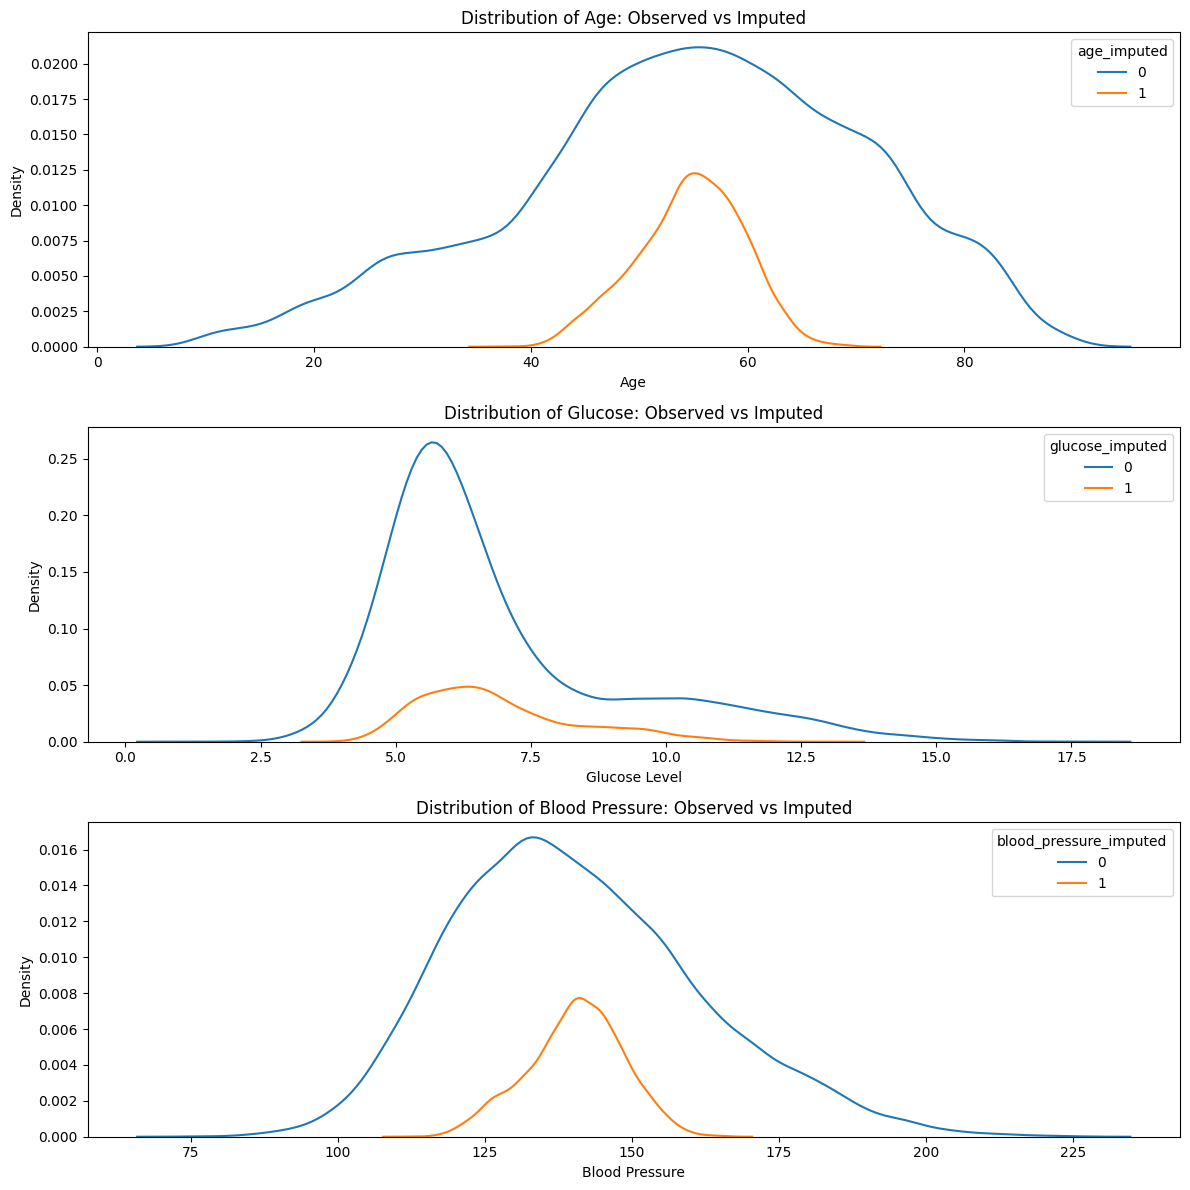

In [21]:
# Helps confirm that the regression imputation produced realistic estimates

# Plot distributions for each variable side by side (subplots)
plt.figure(figsize=(12, 12))

# Plot for age
plt.subplot(3, 1, 1)
sns.kdeplot(data=df, x='age', hue='age_imputed')
plt.title('Distribution of Age: Observed vs Imputed')
plt.xlabel('Age')
plt.ylabel('Density')

# Plot for glucose
plt.subplot(3, 1, 2)
sns.kdeplot(data=df, x='glucose', hue='glucose_imputed')
plt.title('Distribution of Glucose: Observed vs Imputed')
plt.xlabel('Glucose Level')
plt.ylabel('Density')

# Plot for blood pressure
plt.subplot(3, 1, 3)
sns.kdeplot(data=df, x='blood_pressure', hue='blood_pressure_imputed')
plt.title('Distribution of Blood Pressure: Observed vs Imputed')
plt.xlabel('Blood Pressure')
plt.ylabel('Density')

plt.tight_layout()
plt.show()

**Overall Pattern**
* The observed values (blue) show natural variability and wider distribution ranges
* The imputed values (orange) are narrower and more concentrated, which is expected under standard regression imputation
* The imputed values lie within the plausible range of the real data, suggesting the regression model is producing realistic predictions

**Age Plot**
* The imputed ages cluster around a central region (~50–60), which aligns with the densest part of the observed age distribution
* The imputed values do not produce extreme outliers, staying within the realistic human age range
* This indicates the model used meaningful predictors (BMI, cholesterol, stress level, etc.) to estimate reasonable ages

**Glucose Plot**
* Observed glucose has a skewed distribution with a clear peak around ~5–7 mmol/L
* The imputed glucose values fall within this physiological range and follow a similar shape, though with lower variance
* This shows that the predictors capture meaningful biological relationships with glucose levels

**Blood Pressure Plot**
* Observed blood pressure ranges widely (roughly 100–200 mmHg)
* Imputed values cluster between ~120–150 mmHg — a sensible physiological range
* Imputed values align with the central mass of the observed data, indicating the regression model has captured typical blood pressure patterns

**Why This Shows the Imputation Was Successful**
* Imputed values fall within realistic, medically plausible ranges
* The imputed distributions match the general shape (location and scale) of the observed data
* No unnatural spikes, gaps, or extreme values appear in the imputed data
* The smaller variance is expected because regression imputation predicts values on a regression line, reducing randomness in the data
* The results indicate that the predictors contain real information about these variables, meaning the imputation is grounded in meaningful relationships

## Summary of dataset after cleaning

In [24]:
# Get an overview of the updated dataset after all cleaning and imputations
df.head()

,age,gender,medical_condition,glucose,blood_pressure,bmi,oxygen_saturation,length_of_stay,cholesterol,triglycerides,...,glucose_imputed,blood_pressure_imputed,condition_arthritis,condition_asthma,condition_cancer,condition_diabetes,condition_healthy,condition_hypertension,condition_obesity,condition_unknown
0,46.0,Male,Diabetes,7.606741,135.270000,28.90,96.04,6,5.997155,2.377329,...,0,0,0,0,0,1,0,0,0,0
1,22.0,Male,Healthy,3.973223,113.270000,26.29,97.54,2,4.282167,1.461104,...,0,0,0,0,0,0,1,0,0,0
2,50.0,Unknown,Asthma,5.286529,139.092814,22.53,90.31,2,5.559033,1.866885,...,0,1,0,1,0,0,0,0,0,0
3,57.0,Unknown,Obesity,7.436874,130.530000,38.47,96.60,5,5.113410,2.056340,...,1,0,0,0,0,0,0,0,1,0
4,66.0,Female,Hypertension,5.281534,178.170000,31.12,94.90,4,6.712272,1.308005,...,0,0,0,0,0,0,0,1,0,0


In [25]:
# Summarise the dataset using df.info()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 29 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   age                     30000 non-null  float64
 1   gender                  30000 non-null  object 
 2   medical_condition       30000 non-null  object 
 3   glucose                 30000 non-null  float64
 4   blood_pressure          30000 non-null  float64
 5   bmi                     30000 non-null  float64
 6   oxygen_saturation       30000 non-null  float64
 7   length_of_stay          30000 non-null  int64  
 8   cholesterol             30000 non-null  float64
 9   triglycerides           30000 non-null  float64
 10  hba1c                   30000 non-null  float64
 11  smoking_status          30000 non-null  int64  
 12  alcohol_use             30000 non-null  int64  
 13  physical_activity       30000 non-null  float64
 14  diet_score              30000 non-null

**Updated .info() Summary (Post-Cleaning & Imputation)**
* Total rows: 30,000
* Total columns: 29 (increased from 20 columns originally)

**Key changes compared to the original dataset**
1) Missing data has been fully resolved
* All columns now show 30,000 non-null entries, meaning the previous missing values have been successfully imputed in:
    * age
    * gender
    * medical_condition
    * glucose
    * blood_pressure
* We also now have explicit indicator columns showing where imputation occurred (each of which is an integer flag where 0 = not imputed and 1 = imputed):
    * age_imputed
    * glucose_imputed
    * blood_pressure_imputed
2) New binary medical condition columns added
* Eight new columns representing each disease category are now included:
    * condition_arthritis
    * condition_asthma
    * condition_cancer
    * condition_diabetes
    * condition_healthy
    * condition_hypertension
    * condition_obesity
    * condition_unknown
* Each is stored as int64 (0/1) and has no missing values
3) Data types have shifted due to cleaning
* The updated type breakdown is:
    * 12 float columns
    * 15 integer columns (increased due to imputation flags & dummy variables)
    * 2 object columns (gender & medical_condition)
* Compared to before:
    * There are now more integer columns because categorical dummies and imputation indicators were added.
    * One object column was removed (your random textual columns are no longer present).

>After imputation and feature engineering, the dataset now contains 29 fully complete columns with no missing values, including new integer flags for imputation and eight binary medical condition variables, making it fully numeric and ready for regression analysis.

In [26]:
# Summarise the dataset using df.desribe()
df.describe()

,age,glucose,blood_pressure,bmi,oxygen_saturation,length_of_stay,cholesterol,triglycerides,hba1c,smoking_status,...,glucose_imputed,blood_pressure_imputed,condition_arthritis,condition_asthma,condition_cancer,condition_diabetes,condition_healthy,condition_hypertension,condition_obesity,condition_unknown
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000
mean,54.628929,6.861200,140.446793,28.476155,94.954992,4.414133,5.509735,1.996583,45.291246,0.279767,...,0.150000,0.150000,0.059867,0.067900,0.041133,0.213900,0.101300,0.237333,0.128567,0.150000
std,14.850113,2.200929,19.686544,5.728804,3.736202,2.761536,0.866928,0.551121,14.429223,0.448892,...,0.357077,0.357077,0.237244,0.251578,0.198602,0.410064,0.301731,0.425455,0.334725,0.357077
min,10.000000,1.127911,74.240000,7.670000,67.510000,1.000000,2.475883,-0.253811,12.347120,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,46.000000,5.406981,126.998958,24.590000,93.000000,3.000000,4.901073,1.595123,34.751570,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,55.000000,6.208742,139.173509,28.050000,95.300000,4.000000,5.478728,1.957378,41.746130,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,64.000000,7.587868,151.581208,31.810000,97.380000,5.000000,6.085866,2.355538,52.128680,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,89.000000,17.679678,226.380000,56.850000,110.070000,19.000000,9.268589,4.759061,111.582440,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


**Updated .describe() Summary (Post-Cleaning & Feature Engineering)**
1) Sample sizes now complete
* All variables now show 30,000 rows, including age, glucose, and blood pressure.
* This indicates that imputation successfully filled the 4,500 missing values in these columns.
2) Imputation indicator columns added
* New binary columns have been added:
    * age_imputed
    * glucose_imputed
    * blood_pressure_imputed
* Their mean = 0.15, which matches your earlier note that 15% of rows had missing data imputed in these variables.
3) Binary disease columns included
* Eight new dummy variables appear:
    * condition_arthritis
    * condition_asthma
    * condition_cancer
    * condition_diabetes
    * condition_healthy
    * condition_hypertension
    * condition_obesity
    * condition_unknown
* Their means represent the proportion of patients in each disease category, e.g.:
    * Hypertension: mean ≈ 0.237 (23.7%)
    * Diabetes: mean ≈ 0.214 (21.4%)
    * Obesity: mean ≈ 0.129 (12.9%)
    * Unknown: mean = 0.15 (15%)



## Research Plan

**Research Question**

How do demographic, lifestyle, and medical risk factors individually and jointly influence the likelihood of developing major health conditions within a synthetic dataset, and how can these relationships be used to prototype predictive tools for clinicians?

**Hypotheses**

Prior research states that demographic (Tucker-Seeley et al., 2011; Schäfer et al.,2012; Mnatzaganian et al., 2024), lifestyle (Ng et al., 2020), and medical (Jani et al.,2019) risk factors impact the likelihood of developing major health conditions. Based on this literature, we pose the following hypotheses. Note “major health conditions” refers to
hypertension, type 2 diabetes, obesity, asthma, arthritis, and cancer, unless stated otherwise.
* **H1:** Age will correlate with an increased likelihood of developing major health conditions.
* **H2:** Gender will always produce significantly opposing results (>10% difference), with some health conditions being more closely associated with men and other conditions being associated with women.
* **H3:** All healthy lifestyle choices (i.e. not smoking, not drinking alcohol, more physical activity, higher diet score, higher sleep hours). are associated with a decreased likelihood of developing major health conditions.
* **H4:** All medical risk factors increase a patient’s likelihood of developing major health conditions.


**Analyses Plan**
| No. | Analysis step | Description |
|-----|---------------|-------------|
| 1 | Describe the dataset | Summarise demographics, lifestyle factors, medical markers, and disease prevalence using means, standard deviations, and confidence intervals. Create scatter plot visualisations, interpret the plots, and analyse their suitability for logistic regression. |
| 2 | Test H1. Examine how disease risk changes with age | Use logistic regression models with age as the predictor and each disease (individually, then all together) as the dependent variable. Use scatter plots to identify further information on correlations between age and disease. |
| 3 | Test H2. Identify whether gender affects disease risk | Use logistic regression models with gender as the predictor and each disease (individually then together) as the dependent variable. Use scatter plots to identify further information on correlations. |
| 4 | Test H3. Analyse how lifestyle factors influence medical risk markers | Use scatter plots, box plots, logistic regression and multiple linear regression to see how lifestyle behaviours relate to BMI, blood pressure, cholesterol, glucose, and other medical variables. Lifestyle behaviours are the predictor and the medical risk factors are the dependent variables. |
| 5 | Test H4. Identify which medical risk factors predict each disease | Fit linear regressions that include medical markers to build richer models and compare these to the lifestyle only models. Similarly, the disease is the predictor, and the medical risk factor is the dependent variable. Also use scatter plots for further analysis. |
| 6 | Compare predictive power of lifestyle only models and medical inclusive models | Assess how adding medical test results changes coefficient sizes, predicted probabilities, and overall model performance. |
| 7 | Evaluate the overall pathway from lifestyle to medical markers to disease | Bring together findings to assess whether the dataset supports a plausible chain of relationships. |
| 8 | Build a simple classifier that is capable of diagnosing certain conditions | Use nearest neighbour classification to diagnose medical conditions that have plausible causations with variables. E.g. diabetes and glucose level. |
| 9 | Build Shiny app for clinicians | Use the medical inclusive models to allow clinicians to enter any known demographic, lifestyle, as well as the medical test results for more precise risk estimates. Include a classification tool, where medical conditions can be classified based on user inputs. |
| 10 | Discuss limitations and validity | Address synthetic data issues, cross sectional design, model assumptions, and the educational nature of the tool. |

**Outliers**

While keeping in mind that sometimes (especially in health research) outliers are not errors, but they could represent valid cases we will use Z-score to define outliers in our chosen dataset. Z-score will tell us how many standard deviations a data point is from the mean with 3 being the common threshold (a value with a Z-score greater than 3 or less than -3 could be considered an outlier). We will use current literature to distinguish between valid extremes and the noise in our data. We will also use boxplots and scatterplots to visualise chosen variables and the potential outlier.

If the outlier will seem to be due to data or collection errors, they will be removed or corrected depending on the variable. We can replace the outliers using the nearest non-extreme, mean, or median. We can also set thresholds based on the available medical knowledge to cap the data points beyond the set limit (e.g. max BMI = 70 or age = 116).

If the outliers cannot be transformed or removed, we will discuss their presence in our report - the potential reasons for their existence (like medical conditions) and impact on the predictive model we are building.

**References**
* Schäfer, I., Hansen, H., Schön, G. et al. (2012). 'The influence of age, gender and socio-economic status on multimorbidity patterns in primary care: first results from the multicare cohort study'. BMC Health Serv Res, Volume 12, Article 89. https://doi.org/10.1186/1472-6963-12-89
* Jani, B.D., Hanlon, P., Nicholl, B.I. et al. (2019). 'Relationship between multimorbidity, demographic factors and mortality: findings from the UK Biobank cohort'. BMC Med, Volume 17, Article 74. https://doi.org/10.1186/s12916-019-1305-x
* Tucker-Seeley, R., Sorensen, Y., and Subramanian, S. (May 2011). 'Lifecourse socioeconomic circumstances and multimorbidity among older adults'. BMC Public Health, Volume 14, Article 11, p.313. https://doi.org/10.1186/1471-2458-11-313
* Ng, R., Sutradhar, R., Yao, Z., et al. (February 2020). 'Smoking, drinking, diet and physical activity-modifiable lifestyle risk factors and their associations with age to first chronic disease'. Int J Epidemiol, Volume 49, p.113-130. https://doi.org/10.1093/ije/dyz078
* Mnatzaganian, G., Lee, C., Cowen, G. et al. (2024). 'Sex disparities in the prevalence, incidence, and management of diabetes mellitus: an Australian retrospective primary healthcare study involving 668,891 individuals'. BMC Med, Volume 22, Article 475. https://doi.org/10.1186/s12916-024-03698-0

## Diagnostic tests for H1
#### *Examine how disease risk changes with age*

**Models**
* Logistic regression (disease ~ age)
* Multinomial or multi-output logistic regression if modelling all diseases jointly

**Diagnostics Needed**
